## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [127]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [15]:
bodytemp_df = pd.read_csv('data/human_body_temperature.csv')
bodytemp_df

temperature gender  heart_rate
0           99.3      F        68.0
1           98.4      F        81.0
2           97.8      M        73.0
3           99.2      F        66.0
4           98.0      F        73.0
5           99.2      M        83.0
6           98.0      M        71.0
7           98.8      M        78.0
8           98.4      F        84.0
9           98.6      F        86.0
10          98.8      F        89.0
11          96.7      F        62.0
12          98.2      M        72.0
13          98.7      F        79.0
14          97.8      F        77.0
15          98.8      F        83.0
16          98.3      F        79.0
17          98.2      M        64.0
18          97.2      F        68.0
19          99.4      M        70.0
20          98.3      F        78.0
21          98.2      M        71.0
22          98.6      M        70.0
23          98.4      M        68.0
24          97.8      M        65.0
25          98.0      F        87.0
26          97.8      F        62.0
27          98.2      F        69.0
28          98.4      F        73.0
29          98.1      M        67.0
..           ...    ...         ...
100         99.0      M        81.0
101         98.5      M        68.0
102         98.0      F        78.0
103         99.4      F        77.0
104         97.6      M        69.0
105         96.7      M        71.0
106         97.0      M        80.0
107         98.6      M        66.0
108         98.7      F        72.0
109         97.3      M        69.0
110         98.8      F        69.0
111         98.0      F        89.0
112         98.2      F        64.0
113         99.1      F        74.0
114         99.0      M        79.0
115         98.0      M        64.0
116        100.8      F        77.0
117         97.8      F        71.0
118         98.7      M        78.0
119         98.4      F        74.0
120         97.7      F        84.0
121         97.9      F        68.0
122         99.0      F        81.0
123         97.2      F        66.0
124         97.5      M        75.0
125         96.3      M        70.0
126         97.7      M        77.0
127         98.2      F        73.0
128         97.9      M        72.0
129         98.7      F        59.0

[130 rows x 3 columns]

So, we see that we have 130 data points to work with. First, we want to take a look at the overall distribution.

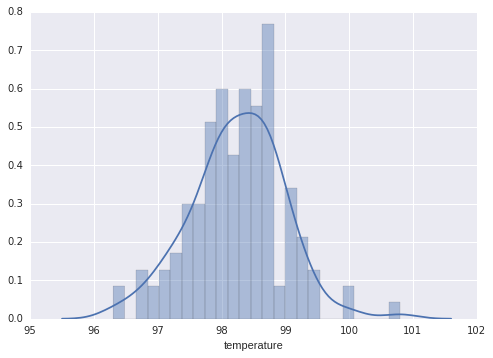

In [19]:
sns.distplot(bodytemp_df.temperature, bins = 25)

In [116]:
st.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

We see that our sample distribution does look like a normal distribution, albeit slightly left skewed. Nonetheless, we feel that it is reasonable to assume the CLT holds for this data. We see from our normaltest that the p-value returned is quite high, 25%. So we cannot reject the null hypothesis of this sample coming from a normal distribution. Thus both a visual inspection and a more rigorous computational one lets us conclude that the popluation is normally distributed in this case. 

Now, we put forth the hypothesis that the true population mean is 98.6. To try and check this, we first require the sample mean, and sample standard deviation. Note that the pandas DataFrame.std method normalizes by N-1 by default.

In [32]:
hyp_mean = 98.6
sample_meantemp = bodytemp_df['temperature'].mean()
sample_std = bodytemp_df['temperature'].std()
print('The sample mean is : ' , bodytemp_df['temperature'].mean(), ' degrees Farenheit')
print('The sample standard deviation is : ' , bodytemp_df['temperature'].std(), ' degrees Farenheit')

The sample mean is :  98.24923076923078  degrees Farenheit
The sample standard deviation is :  0.7331831580389454  degrees Farenheit


Since we have a 'large' sample size, we can estimate the population standard deviation, and population mean as being equal to the sample standard deviation and the sample mean. We use the sample standard deviation and sample size to obtain our best estimate of the standard error of the mean.

In [30]:
sem_temp = sample_std/np.sqrt(len(bodytemp_df))
sem_temp

0.06430441683789101

In [104]:
sample_std/np.sqrt(130)

0.06430441683789101

In [66]:
z_score = (sample_meantemp - hyp_mean) / (sem_temp)
z_score

-5.4548232923640789

In [68]:
p_value=st.norm.cdf(z_score)
p_value

2.4510785070566898e-08

In [81]:
new_hyp = 98.2
z_score_new = (sample_meantemp - new_hyp)/ (sem_temp)
print(z_score_new)
p_value_new = 1-st.norm.cdf(z_score_new)
p_value_new

0.765589234016


0.22196037619368836

Thus from our hypothesis that our sample population mean is incorrect, and that the real mean is 98.6 degrees seems decidedly unlikely. We are confident that the probablity of finding a value at least as low in our sample population (more than 5 stds below the mean!), is only $2.45\times10^{-8}$. Thus we choose to reject the original hypothesis that the population mean is 98.6 degrees, based on the available data. Instead we shall accept the new value of 98.2, which as seen above, is well within one standard deviation of the sample mean. 

To find the normal range of human body temperatures, we need a confidence interval. Let us use the usual 95% condifence interval as our threshold. That is, we will be resonably confident that there is a 95% the true popluation mean is within our confidence interval. 

In [93]:
z_critical = st.norm.ppf(.975)
conf_int = z_critical*sem_temp
print ('margin of error: ', conf_int)
print('upper limit of normal: ', sample_meantemp + conf_int)
print('lower limit of normal: ', sample_meantemp - conf_int)

margin of error:  0.126034341049
upper limit of normal:  98.3752651103
lower limit of normal:  98.1231964282


So if human body temperature is outside of the range given above, then we are reasonably sure that the temperature is abnormal, as our range should encompass 95% of the population. 

Now we move on to testing if there is a significant differnce between males and females.

In [98]:
female_df = bodytemp_df[bodytemp_df.gender == 'F'].copy()
male_df = bodytemp_df[bodytemp_df.gender == 'M'].copy()

In [101]:
male_mean = male_df['temperature'].mean()
print('Male mean is: ', male_mean)
female_mean = female_df['temperature'].mean()
print('Female mean is: ', female_mean)
male_std = male_df['temperature'].std()
print('Male standard deviation is: ', male_std)
female_std = female_df['temperature'].std()
print('Female standard deviation is: ', female_std)

Male mean is:  98.1046153846154
Female mean is:  98.39384615384613
Male standard deviation is:  0.6987557623265908
Female standard deviation is:  0.7434877527313665


In [112]:
difference_mean = female_mean - male_mean
print('Mean difference between two populations: ', difference_mean)
difference_sem = np.sqrt(male_std**2/len(male_df) + female_std**2/len(female_df))
print( 'Standard error of the mean: ', difference_sem)

Mean difference between two populations:  0.289230769230727
Standard error of the mean:  0.12655395042


Now that we have our population mean difference, as well as the standard error of this mean, we can go ahead and look up p-values for our data, and compare it to some threshold. Let's use the standard 5% threshold.

In [131]:
z_score_diff = (difference_mean - 0)/difference_sem
z_score_diff

2.2854345381652741

In [133]:
p_value_diff = 1-st.norm.cdf(z_score_diff)
p_value_diff

0.011143680380338639

Thus since our p_value is about 1%, well below the 5% threshold we had decided on, we conclude that there does seem to be a significant difference between men and women in terms of body temperature. What this p-value represents is that if the null hypothesis was true (no difference), then we would only expect to sample such a large difference 1 out of 100 times, based on chance. So we are confident that the observed effect is real. 